# Modelado de distribución de especies

## Importación de librerías:

In [ ]:
# %%capture: Captura la salida de las celdas en Jupyter.
%%capture

# Instala contextily para agregar mapas base a visualizaciones geoespaciales.
!pip3 install contextily

# Instala pyogrio para usar GeoPandas con archivos vectoriales (Shapefile, GeoJSON).
!pip install pyogrio

# Instala rioxarray para gestionar y analizar datos raster geoespaciales.
!pip install rioxarray

# Instala earthpy para manejar y visualizar datos de teledetección.
!pip install earthpy

# Instala rtree para trabajar con índices espaciales.
!pip install rtree

# Instala pyimpute para la imputación espacial.
!pip install pyimpute

# Instala basemap para generar mapas geográficos.
!python -m pip install basemap

In [ ]:
# Instala la versión 1.3.3 de pandas para compatibilidad con pyjanitor.
!pip install pandas==1.3.3

# Actualiza pyjanitor para limpieza y manipulación de datos.
!pip install --upgrade pyjanitor

  Using cached pandas-1.3.3-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (11 kB)
Using cached pandas-1.3.3-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (11.5 MB)
  Attempting uninstall: pandas
    Found existing installation: pandas 2.2.3
    Uninstalling pandas-2.2.3:
      Successfully uninstalled pandas-2.2.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
arviz 0.20.0 requires pandas>=1.5.0, but you have pandas 1.3.3 which is incompatible.
bigframes 1.25.0 requires pandas>=1.5.3, but you have pandas 1.3.3 which is incompatible.
cudf-cu12 24.10.1 requires pandas<2.2.3dev0,>=2.0, but you have pandas 1.3.3 which is incompatible.
geopandas 1.0.1 requires pandas>=1.4.0, but you have pandas 1.3.3 which is incompatible.
google-colab 1.0.0 requires pandas==2.2.2, but you have pandas 1.3.3 which is incompatible.
ibis-framework 9.

In [ ]:
# Instala geohexgrid para crear cuadrículas hexagonales geográficas.
!pip install geohexgrid

# Instala matplotlib-scalebar para agregar una barra de escala en gráficos.
!pip install matplotlib-scalebar

In [ ]:
import contextily as cx            # Mapas base
import glob                        # Manejo de archivos/directorios
import json                        # Datos JSON
import geopandas as gpd            # Manipulación de datos espaciales
import math                        # Funciones matemáticas
import matplotlib.colors as colors # Personalización de colores en gráficos
import matplotlib.pyplot as plt    # Generación de gráficos
import numpy as np                 # Arrays y operaciones matemáticas
import os                          # Operaciones del sistema operativo
import pandas as pd                # Manipulación y análisis de datos
import seaborn as sns              # Gráficos estadísticos
import requests                    # Solicitudes HTTP
import random                      # Generación de números aleatorios

In [ ]:
import ee                                                                       # API de Google Earth Engine
import geemap                                                                   # Mapas interactivos con Google Earth Engine
import geemap.colormaps as cm                                                   # Paletas de colores personalizables
from statsmodels.stats.outliers_influence import variance_inflation_factor      # VIF para detectar colinealidad en regresión

In [ ]:
import janitor                                                                    # Extensión de pandas para limpieza de datos
import numexpr                                                                    # Evaluación rápida de expresiones numéricas
import matplotlib.patches as mpatches                                             # Añade formas geométricas a gráficos
import rasterio as rio                                                            # Lectura/escritura de datos raster geoespaciales
import rioxarray as rxr                                                           # Extiende xarray y rasterio
from matplotlib.colors import ListedColormap, Normalize                           # Manipulación de colores en gráficos
from shapely.geometry import mapping, Polygon, Point, MultiPolygon, LineString, box # Creación y manipulación de geometrías

In [ ]:
import geohexgrid as ghg                                                        # Cuadrículas hexagonales
import xarray as xr                                                             # Arrays multidimensionales etiquetados
from matplotlib_scalebar.scalebar import ScaleBar                               # Barra de escala en gráficos
from geopandas import GeoDataFrame                                              # Creación de GeoDataFrames
from google.colab import files, drive                                           # Manejo de archivos en Google Colab
from matplotlib.axes._axes import _log as matplotlib_axes_logger                # Control de logs en ejes de Matplotlib
from sklearn.experimental import enable_iterative_imputer                       # Habilita Imputadores iterativos
from sklearn.impute import SimpleImputer, IterativeImputer, KNNImputer          # Métodos de imputación
from sklearn.preprocessing import StandardScaler                                # Estandarización de datos
from shapely.geometry import mapping, Point, Polygon                            # Manejo de geometrías para recortes raster

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Clases y funciones personalizadas para cargar datos de WorldClim en Colab

!git clone https://github.com/jsblandon/bioclim_wc21_preprocessing.git             # Clona repositorio de GitHub
import sys                                                                         # Acceso al sistema
sys.path.append('/content/bioclim_wc21_preprocessing')                             # Añade ruta del repositorio

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Cloning into 'bioclim_wc21_preprocessing'...
remote: Enumerating objects: 13, done.
remote: Counting objects: 100% (13/13), done.
remote: Compressing objects: 100% (12/12), done.
remote: Total 13 (delta 3), reused 8 (delta 1), pack-reused 0 (from 0)
Receiving objects: 100% (13/13), 4.38 KiB | 4.38 MiB/s, done.
Resolving deltas: 100% (3/3), done.


In [ ]:
from world_clim_class import WorldClim                                        # Clase para manejar datos de WorldClim
from world_clim_class_support_mods import bio_raster_loading                  # Carga datos raster bioclimáticos
from natsort import natsorted                                                 # Ordenación natural de cadenas

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
from pyimpute import impute                                         # Imputación espacial en datos raster
from pyimpute import load_training_vector                           # Carga vectores de entrenamiento geoespaciales
from pyimpute import load_targets                                   # Carga imágenes raster para imputación
from sklearn import model_selection                                 # División y validación de modelos
from sklearn.model_selection import train_test_split                # División de datos en entrenamiento y prueba
from sklearn.linear_model import LogisticRegression                 # Regresión logística
from sklearn.metrics import accuracy_score, classification_report   # Métricas de precisión y reporte de clasificación


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
%matplotlib inline                                # Muestra gráficos en línea en Jupyter
%config InlineBackend.figure_formats = ['svg']    # Configura salida de gráficos en formato SVG

sns.set_style('whitegrid')                        # Estilo de gráficos con fondo de cuadrícula blanca

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


UsageError: unrecognized arguments: # Muestra gráficos en línea en Jupyter


## Cargue de datos CSV

In [ ]:
drive.mount('/content/drive')                   # Acceso a archivos de Google Drive en Colab

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Mounted at /content/drive


In [ ]:
# Ruta del archivo CSV: María Victoria y Paula
file_path = '/content/drive/MyDrive/Proyecto aplicado /Procesamiento variables exogenas/filtered_df_final2.csv'

# Ruta del archivo CSV: Juan Blandon
# file_path = '/content/drive/MyDrive/research/codes/Proyecto aplicado /Procesamiento variables exogenas/filtered_df_final2.csv'

# Lee el archivo CSV sin fragmentación y convierte observation_date a datetime
df_cr = pd.read_csv(file_path, low_memory=False, parse_dates=["observation_date"])

df_cr['last_edited_date'] = pd.to_datetime(df_cr['last_edited_date'], errors='coerce')

df_cr.info()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19233 entries, 0 to 19232
Data columns (total 33 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   checklist_id               19233 non-null  object        
 1   last_edited_date           14470 non-null  datetime64[ns]
 2   country                    19233 non-null  object        
 3   country_code               19233 non-null  object        
 4   state                      19233 non-null  object        
 5   state_code                 19233 non-null  object        
 6   locality                   19233 non-null  object        
 7   locality_id                19233 non-null  object        
 8   locality_type              19233 non-null  object        
 9   latitude                   19233 non-null  float64       
 10  longitude                  19233 non-null  float64       
 11  observation_date           19233 non-null  datetime64[ns]
 12  time

In [ ]:
# Convertimos a los tipos de datos definidos por el paquete auk() en el preprocesamiento eBird

# Atributos de tipo cadena (texto)
char_attributes = ["checklist_id","country","country_code","state","state_code",
                   "locality","locality_id","locality_type","observer_id",
                   "sampling_event_identifier","protocol_type","protocol_code",
                   "project_code","group_identifier","trip_comments","scientific_name",
                   "time_observations_started"]

# Atributos de tipo flotante (números decimales)
float_attributes= ["latitude","longitude","effort_distance_km",
                   "effort_hours","effort_speed_kmph","hours_of_day","year",
                   "day_of_year"]

# Atributos de tipo entero (números enteros)
int_attributes  = ["duration_minutes","number_observers","observation_count"]

# Atributos de tipo booleano (verdadero/falso)
bool_attributes = ["all_species_reported","species_observed"]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Conversion a tipos de datos string (cadenas)
df_cr[char_attributes] = df_cr[char_attributes].astype(str)

# Conversion a tipos de datos float (flotantes)
df_cr[float_attributes] = df_cr[float_attributes].astype(float)

# Conversion a tipos de datos integer (enteros)
df_cr[int_attributes] = df_cr[int_attributes].astype(int)

# Conversion a tipos de datos boolean (booleanos)
df_cr[bool_attributes] = df_cr[bool_attributes].astype(bool)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
df_cr.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,checklist_id,last_edited_date,country,country_code,state,state_code,locality,locality_id,locality_type,latitude,...,trip_comments,scientific_name,observation_count,species_observed,status_co,effort_hours,effort_speed_kmph,hours_of_day,year,day_of_year
0,S52977144,2023-10-24 07:14:28.845856,Colombia,CO,Risaralda,CO-RIS,Via La Florida -- La Suiza,L6672775,P,4.744578,...,nan,Henicorhina negreti,0,False,En peligro critico,1.266667,3.434211,6.783333,2019.0,51.0
1,S54895798,2023-10-24 07:21:35.964443,Colombia,CO,Risaralda,CO-RIS,Via La Florida -- La Suiza,L6672775,P,4.744578,...,nan,Henicorhina negreti,0,False,En peligro critico,1.000000,0.000000,11.000000,2019.0,101.0
2,S61672676,2023-10-24 07:51:59.264845,Colombia,CO,Risaralda,CO-RIS,Via La Florida -- La Suiza,L6672775,P,4.744578,...,nan,Henicorhina negreti,0,False,En peligro critico,1.266667,1.602632,5.783333,2019.0,327.0
3,S52411371,NaT,Colombia,CO,Risaralda,CO-RIS,Av 30 de Agosto Calle 39,L6720653,P,4.813223,...,nan,Henicorhina negreti,0,False,En peligro critico,0.416667,1.920000,7.583333,2019.0,35.0
4,S55205250,2021-08-19 17:25:20.911490,Colombia,CO,Risaralda,CO-RIS,Casa La Lolita Vereda Tribuna- Consota,L6729274,P,4.772187,...,nan,Henicorhina negreti,0,False,En peligro critico,5.000000,0.000000,12.833333,2019.0,110.0


In [ ]:
# Habilita numexpr en pandas para optimizar consultas numéricas con pd.query()
pd.set_option('compute.use_numexpr', True)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


## Inicializa la biblioteca de Google Earth Engine

In [ ]:
ee.Authenticate()

# Paula
# ee.Initialize(project='ee-aves-endemicas-colombia-pl')

# Victoria
ee.Initialize(project='ee-aves-endemicas-colombia')

# Juan Blandon
# ee.Initialize(project='ee-aves-endemicas')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


## Land Use and Land Cover (LULC), (Uso del Suelo y Cobertura del Suelo, por sus siglas en inglés). MapBiomas usando GEE

### Convierte el DataFrame df_cr en un GeoDataFrame - crea geometrías de tipo "punto" a partir de las coordenadas de latitud y longitud

In [ ]:
# Crea columna 'month' con el número del mes de observation_date
df_cr['month'] = df_cr['observation_date'].dt.month

# Cambia el índice a 'observation_date' para análisis temporal
df_cr.set_index("observation_date", inplace=True)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Convierte el DataFrame limpio en un GeoDataFrame con geometrías de tipo punto
gdf = gpd.GeoDataFrame(
    df_cr,
    geometry=gpd.points_from_xy(df_cr.longitude, df_cr.latitude),
    crs="EPSG:4326"
)[["scientific_name", "year", "month", "latitude", "longitude", "observation_count", "geometry"]]

# Muestra la primera fila del GeoDataFrame para verificación
gdf.head(1)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,scientific_name,year,month,latitude,longitude,observation_count,geometry
observation_date,,,,,,,
2019-02-20,Henicorhina negreti,2019.0,2,4.744578,-75.603753,0,POINT (-75.60375 4.74458)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


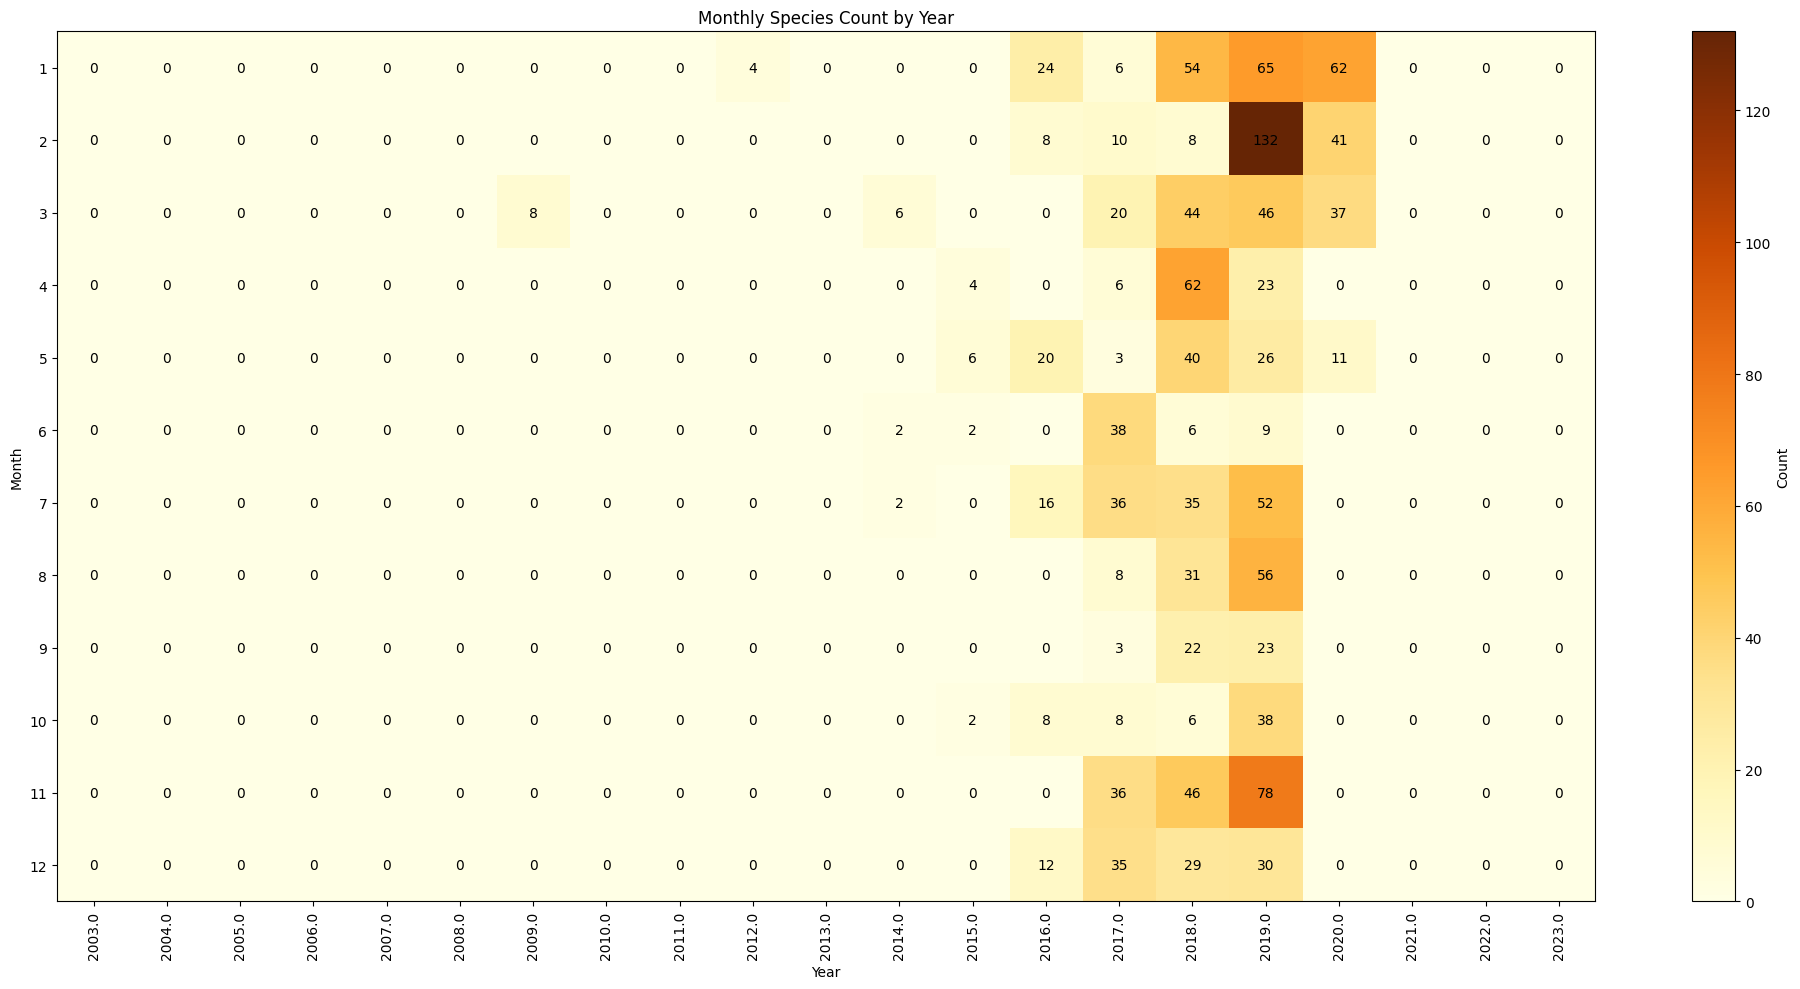

In [ ]:
# Mapa de calor (heatmap)

def plot_heatmap(gdf, h_size=20, v_size=10):                                                           # Define función para graficar un mapa de calor

    statistics = gdf.groupby(["month", "year"])["observation_count"].sum().unstack(fill_value=0)       # Agrupa datos por mes y año, suma 'observation_count'

    plt.figure(figsize=(h_size, v_size))                                                               # Crea figura con tamaño definido
    heatmap = plt.imshow(statistics.values, cmap="YlOrBr", aspect="auto")                              # Genera mapa de calor con paleta YlOrBr

    for i in range(len(statistics.index)):                                                             # Agrega valores en cada celda del mapa de calor
        for j in range(len(statistics.columns)):
            plt.text(j, i, statistics.values[i, j], ha="center", va="center", color="black")

    plt.colorbar(heatmap, label="Count")                                                               # Barra de colores con etiqueta
    plt.title("Monthly Species Count by Year")                                                         # Título del gráfico
    plt.xlabel("Year")                                                                                 # Etiqueta eje X
    plt.ylabel("Month")                                                                                # Etiqueta eje Y
    plt.xticks(range(len(statistics.columns)), statistics.columns, rotation=90)                        # Configura marcas en eje X
    plt.yticks(range(len(statistics.index)), statistics.index)                                         # Configura marcas en eje Y
    plt.tight_layout()                                                                                 # Ajuste de espaciado
    plt.show()                                                                                         # Muestra gráfico

plot_heatmap(gdf)

### Convierte un GeoDataFrame a un objeto de Earth Engine (EE)

In [ ]:
# Convierte un GeoDataFrame en un objeto de Earth Engine (EE)
data_raw = geemap.geopandas_to_ee(gdf)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Tamaño de píxeles para la resolución espacial (en metros)
grain_size = 2000

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


### Delimitación del área de interés con shapefile y se utiliza Goole Earth Enginer para acceder a MapBiomas en Risaralda

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


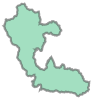

In [ ]:
# Departamentos: Colombia

# path = "/content/drive/MyDrive/research/codes/Proyecto aplicado /Departamentos_Junio_2024_shp/Departamento.shp"         # Ruta Juan Blandon
path = "/content/drive/MyDrive/Proyecto aplicado /Departamentos_Junio_2024_shp/Departamento.shp"                          # Ruta Victoria y Paula
roi = gpd.read_file(path, engine='pyogrio', use_arrow=True)
roi = roi.clean_names()
roi = roi.to_crs(4326)                                                                                                    # Convierte CRS a EPSG:4326
sta_roi = roi.query("denombre == 'Risaralda'")                                                                            # Filtra solo 'Risaralda'
sta_roi = sta_roi.geometry.iloc[0]                                                                                        # Extrae geometría de Risaralda
sta_roi

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


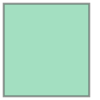

In [ ]:
# Construcción de una bounding box (caja delimitadora) a partir de la geometría seleccionada (Roi)

bbox = sta_roi.bounds           # Extrae límites de la geometría de sta_roi

# Bounding box definida por cuatro coordenadas: xmin, ymin, xmax, ymax
bbox = Polygon([(bbox[0], bbox[1]), (bbox[0], bbox[3]), (bbox[2], bbox[3]), (bbox[2], bbox[1])])

bbox_xmin = bbox.bounds[0]
bbox_ymin = bbox.bounds[1]
bbox_xmax = bbox.bounds[2]
bbox_ymax = bbox.bounds[3]

bbox

In [ ]:
# Accede a un activo de la colección MapBiomas para Colombia en Google Earth Engine

mapbiomas_asset = 'projects/mapbiomas-raisg/MAPBIOMAS-COLOMBIA/COLECCION1/INTEGRACION/integracion-pais/Integracion-COLOMBIA-3' # Ruta del activo en GEE
asset_properties = ee.data.getAsset(mapbiomas_asset)                                                                           # Obtiene propiedades del activo
asset_properties

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


{'type': 'IMAGE',
 'name': 'projects/earthengine-legacy/assets/projects/mapbiomas-raisg/MAPBIOMAS-COLOMBIA/COLECCION1/INTEGRACION/integracion-pais/Integracion-COLOMBIA-3',
 'id': 'projects/mapbiomas-raisg/MAPBIOMAS-COLOMBIA/COLECCION1/INTEGRACION/integracion-pais/Integracion-COLOMBIA-3',
 'properties': {'descripcion': 'filtro frecuencia general',
  'code_region': 30406,
  'paso': 'P07',
  'version': 3,
  'pais': 'COLOMBIA'},
 'updateTime': '2023-09-20T14:14:25.691315Z',
 'geometry': {'type': 'Polygon',
  'coordinates': [[[-88.22190260398155, 21.36970817397722],
    [-88.22188417373195, -6.055408940190116],
    [-87.62876182799094, -6.057664717387897],
    [-87.03563523390137, -6.059276166862931],
    [-86.44250580654337, -6.060243112060335],
    [-85.84937496220977, -6.060565447068736],
    [-85.25624411785822, -6.060243136566376],
    [-84.66311469041037, -6.0592762158660305],
    [-84.06998809618604, -6.057664790888053],
    [-83.4768657502564, -6.055409038169364],
    [-83.002393591

### Recortar la imagen de MapBiomas a la región de interés (Roi - Risaralda), y seleccionar una banda correspondiente al año de requerido

In [ ]:
# Lista de años de interés
years = [2014, 2015, 2016, 2017, 2018, 2019, 2020]

# Victoria y Paula
output_dir = "/content/drive/MyDrive/Proyecto aplicado /Variables Bioclimaticas/MapBiomas_Output_ris"

# Juan
# output_dir = "/content/drive/MyDrive/research/codes/Proyecto aplicado /Variables Bioclimaticas/MapBiomas_Output_ris"

if not os.path.exists(output_dir):
    os.makedirs(output_dir)                       # Crea el directorio si no existe

# Ciclo para exportar imágenes de cada año
for year in years:
    band_id = f'classification_{year}'

    mapbiomas_image = ee.Image(mapbiomas_asset)   # Objeto de imagen GEE a partir de MapBiomas
    mapbiomas_year = mapbiomas_image.select(band_id)  # Selecciona banda del año actual

    # Define la región de interés (ROI)
    sta_roi = ee.Geometry.Rectangle([bbox_xmin, bbox_ymin, bbox_xmax, bbox_ymax])

    # Recorta la imagen a la ROI
    image_roi = mapbiomas_year.clip(sta_roi)

    # Nombre del archivo TIFF para cada año
    filename = f'mapbiomas_ris_{year}.tif'
    output_path = os.path.join(output_dir, filename)

    # Exporta la imagen usando geemap.ee_export_image
    geemap.ee_export_image(
        image_roi, filename=output_path, scale=90, region=sta_roi.getInfo()['coordinates']
    )

    # Confirmación de exportación
    print(f'Exportando imagen para el año {year} con el nombre {output_path}')


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Generating URL ...
Please wait ...
Data downloaded to /content/drive/MyDrive/Proyecto aplicado /Variables Bioclimaticas/MapBiomas_Output_ris/mapbiomas_ris_2014.tif
Exportando imagen para el año 2014 con el nombre /content/drive/MyDrive/Proyecto aplicado /Variables Bioclimaticas/MapBiomas_Output_ris/mapbiomas_ris_2014.tif
Generating URL ...
Please wait ...
Data downloaded to /content/drive/MyDrive/Proyecto aplicado /Variables Bioclimaticas/MapBiomas_Output_ris/mapbiomas_ris_2015.tif
Exportando imagen para el año 2015 con el nombre /content/drive/MyDrive/Proyecto aplicado /Variables Bioclimaticas/MapBiomas_Output_ris/mapbiomas_ris_2015.tif
Generating URL ...
Please wait ...
Data downloaded to /content/drive/MyDrive/Proyecto aplicado /Variables Bioclimaticas/MapBiomas_Output_ris/mapbiomas_ris_2016.tif
Exportando imagen para el año 2016 con el nombre /content/drive/MyDrive/Proyecto aplicado /Variables Bioclimaticas/MapBiomas_Output_ris/mapbiomas_ris_2016.tif
Generating URL ...
Please wait 

#### Año 2014

In [ ]:
Map = geemap.Map()
Map.addLayer(image_roi, {}, "MapBiomas Colombia_2014")
Map

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Map(center=[0, 0], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=SearchDataGUI(childr…

In [ ]:
path = "/content/drive/MyDrive/Proyecto aplicado /Variables Bioclimaticas/MapBiomas_Output_ris/mapbiomas_ris_2014.tif"   # Ruta de imagen raster en Google Drive
# Juan
# path = "/content/drive/MyDrive/research/codes/Proyecto aplicado /Variables Bioclimaticas/MapBiomas_Output_ris/mapbiomas_ris_2014.tif"

raster_ris = rxr.open_rasterio(path, masked=True).squeeze()    # Carga y ajusta la imagen raster

In [ ]:
unique_values = np.unique(raster_ris)
unique_values

array([ 3.,  9., 13., 21., 24., 25., 27., 29., 30., 33., 34.],
      dtype=float32)

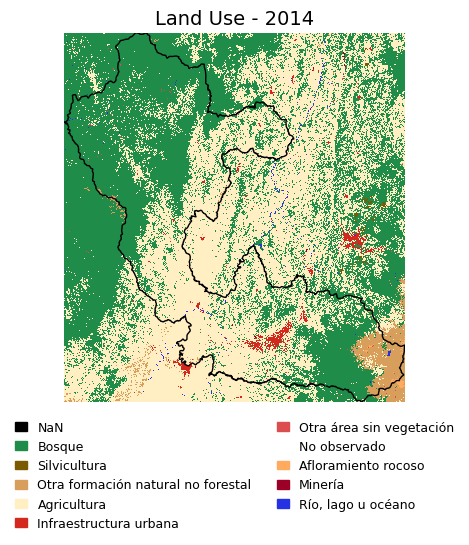

In [ ]:
fig, axis = plt.subplots(nrows=1, ncols=1)                                                # Crea figura y eje para la gráfica

values = [0., 3., 9., 13., 21., 24., 25., 27., 29., 30., 33., 34.]                        # Valores de categorías de uso del suelo
colors_list = ['#000000', '#1f8d49', '#7a5900', '#d89f5c', '#ffefc3', '#d4271e',          # Colores asociados a cada categoría
               '#db4d4f', '#FFFFFF', '#ffaa5f', '#9c0027', '#2532e4', '#93dfe6']
labels = ['NaN', 'Bosque', 'Silvicultura', 'Otra formación natural no forestal',           # Etiquetas descriptivas para cada categoría
          'Agricultura', 'Infraestructura urbana', 'Otra área sin vegetación',
          'No observado', 'Afloramiento rocoso', 'Minería', 'Río, lago u océano',
          'Glaciar']

cmap = colors.ListedColormap(colors_list)                                                  # Colormap personalizado con colors_list
bounds = values + [256]                                                                    # Extiende bounds para cubrir todas las categorías
norm = colors.BoundaryNorm(bounds, cmap.N)                                                 # Normaliza el colormap según bounds

raster_ris.plot.imshow(ax=axis, cmap=cmap, norm=norm, add_colorbar=False)                  # Dibuja imagen raster con colormap y normalización
roi.query("denombre == 'Risaralda'").plot(ax=axis, facecolor="none", edgecolor='black')    # Dibuja contorno de Risaralda en negro

legend_patches = [mpatches.Patch(color=colors_list[i], label=labels[i]) for i in range(len(values)-1)]  # Crea lista de leyenda con colores y etiquetas

plt.legend(handles=legend_patches, bbox_to_anchor=(0.5, -0.02), loc='upper center',        # Agrega leyenda centrada, sin marco
           ncol=2, fontsize=9, handlelength=1, frameon=False)

plt.axis('off')                                                                            # Desactiva ejes
plt.title('Land Use - 2014', fontsize=14)                                                  # Título del gráfico

plt.show()


#### Año 2015

In [ ]:
path = "/content/drive/MyDrive/Proyecto aplicado /Variables Bioclimaticas/MapBiomas_Output_ris/mapbiomas_ris_2015.tif"
# Juan
# path = "/content/drive/MyDrive/research/codes/Proyecto aplicado /Variables Bioclimaticas/MapBiomas_Output_ris/mapbiomas_ris_2015.tif"
raster_ris = rxr.open_rasterio(path, masked = True).squeeze()

In [ ]:
unique_values = np.unique(raster_ris)
unique_values

array([ 3.,  9., 13., 21., 24., 25., 27., 29., 30., 33., 34.],
      dtype=float32)

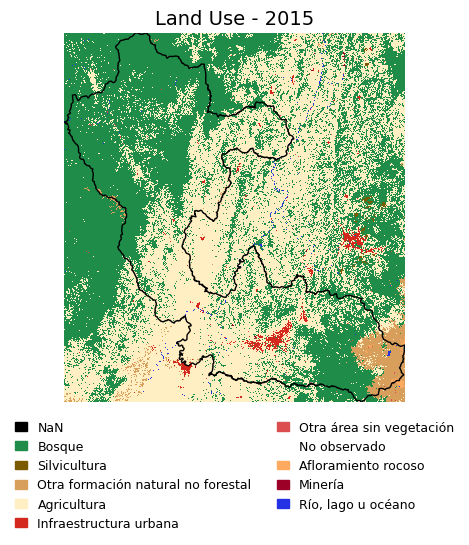

In [ ]:
fig, axis = plt.subplots(nrows=1, ncols=1)                                                # Crea figura y eje para la gráfica

values = [0., 3., 9., 13., 21., 24., 25., 27., 29., 30., 33., 34.]                        # Valores de categorías de uso del suelo
colors_list = ['#000000', '#1f8d49', '#7a5900', '#d89f5c', '#ffefc3', '#d4271e',          # Colores asociados a cada categoría
               '#db4d4f', '#FFFFFF', '#ffaa5f', '#9c0027', '#2532e4', '#93dfe6']
labels = ['NaN', 'Bosque', 'Silvicultura', 'Otra formación natural no forestal',           # Etiquetas descriptivas para cada categoría
          'Agricultura', 'Infraestructura urbana', 'Otra área sin vegetación',
          'No observado', 'Afloramiento rocoso', 'Minería', 'Río, lago u océano',
          'Glaciar']

cmap = colors.ListedColormap(colors_list)                                                  # Colormap personalizado con colors_list
bounds = values + [256]                                                                    # Extiende bounds para cubrir todas las categorías
norm = colors.BoundaryNorm(bounds, cmap.N)                                                 # Normaliza el colormap según bounds

raster_ris.plot.imshow(ax=axis, cmap=cmap, norm=norm, add_colorbar=False)                  # Dibuja imagen raster con colormap y normalización
roi.query("denombre == 'Risaralda'").plot(ax=axis, facecolor="none", edgecolor='black')    # Dibuja contorno de Risaralda en negro

legend_patches = [mpatches.Patch(color=colors_list[i], label=labels[i]) for i in range(len(values)-1)]  # Crea lista de leyenda con colores y etiquetas

plt.legend(handles=legend_patches, bbox_to_anchor=(0.5, -0.02), loc='upper center',        # Agrega leyenda centrada, sin marco
           ncol=2, fontsize=9, handlelength=1, frameon=False)

plt.axis('off')                                                                            # Desactiva ejes
plt.title('Land Use - 2015', fontsize=14)                                                  # Título del gráfico

plt.show()

#### Año 2016

In [ ]:
path = "/content/drive/MyDrive/Proyecto aplicado /Variables Bioclimaticas/MapBiomas_Output_ris/mapbiomas_ris_2016.tif"
# Juan
# path = "/content/drive/MyDrive/research/codes/Proyecto aplicado /Variables Bioclimaticas/MapBiomas_Output_ris/mapbiomas_ris_2016.tif"
raster_ris = rxr.open_rasterio(path, masked = True).squeeze()

In [ ]:
unique_values = np.unique(raster_ris)
unique_values

array([ 3.,  9., 13., 21., 24., 25., 27., 29., 30., 33., 34.],
      dtype=float32)

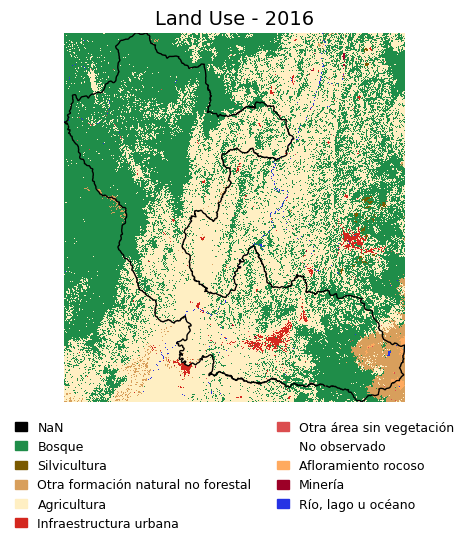

In [ ]:
fig, axis = plt.subplots(nrows=1, ncols=1)                                                # Crea figura y eje para la gráfica

values = [0., 3., 9., 13., 21., 24., 25., 27., 29., 30., 33., 34.]                        # Valores de categorías de uso del suelo
colors_list = ['#000000', '#1f8d49', '#7a5900', '#d89f5c', '#ffefc3', '#d4271e',          # Colores asociados a cada categoría
               '#db4d4f', '#FFFFFF', '#ffaa5f', '#9c0027', '#2532e4', '#93dfe6']
labels = ['NaN', 'Bosque', 'Silvicultura', 'Otra formación natural no forestal',           # Etiquetas descriptivas para cada categoría
          'Agricultura', 'Infraestructura urbana', 'Otra área sin vegetación',
          'No observado', 'Afloramiento rocoso', 'Minería', 'Río, lago u océano',
          'Glaciar']

cmap = colors.ListedColormap(colors_list)                                                  # Colormap personalizado con colors_list
bounds = values + [256]                                                                    # Extiende bounds para cubrir todas las categorías
norm = colors.BoundaryNorm(bounds, cmap.N)                                                 # Normaliza el colormap según bounds

raster_ris.plot.imshow(ax=axis, cmap=cmap, norm=norm, add_colorbar=False)                  # Dibuja imagen raster con colormap y normalización
roi.query("denombre == 'Risaralda'").plot(ax=axis, facecolor="none", edgecolor='black')    # Dibuja contorno de Risaralda en negro

legend_patches = [mpatches.Patch(color=colors_list[i], label=labels[i]) for i in range(len(values)-1)]  # Crea lista de leyenda con colores y etiquetas

plt.legend(handles=legend_patches, bbox_to_anchor=(0.5, -0.02), loc='upper center',        # Agrega leyenda centrada, sin marco
           ncol=2, fontsize=9, handlelength=1, frameon=False)

plt.axis('off')                                                                            # Desactiva ejes
plt.title('Land Use - 2016', fontsize=14)                                                  # Título del gráfico

plt.show()

#### Año 2017

In [ ]:
path = "/content/drive/MyDrive/Proyecto aplicado /Variables Bioclimaticas/MapBiomas_Output_ris/mapbiomas_ris_2017.tif"
# Juan
# path = "/content/drive/MyDrive/research/codes/Proyecto aplicado /Variables Bioclimaticas/MapBiomas_Output_ris/mapbiomas_ris_2017.tif"
raster_ris = rxr.open_rasterio(path, masked = True).squeeze()

In [ ]:
unique_values = np.unique(raster_ris)
unique_values

array([ 3.,  9., 13., 21., 24., 25., 27., 29., 30., 33., 34.],
      dtype=float32)

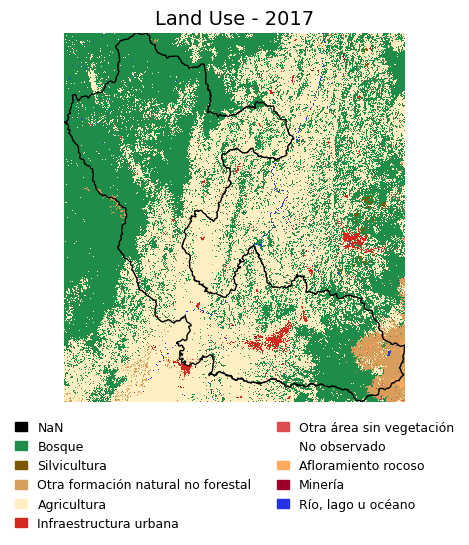

In [ ]:
fig, axis = plt.subplots(nrows=1, ncols=1)                                                # Crea figura y eje para la gráfica

values = [0., 3., 9., 13., 21., 24., 25., 27., 29., 30., 33., 34.]                        # Valores de categorías de uso del suelo
colors_list = ['#000000', '#1f8d49', '#7a5900', '#d89f5c', '#ffefc3', '#d4271e',          # Colores asociados a cada categoría
               '#db4d4f', '#FFFFFF', '#ffaa5f', '#9c0027', '#2532e4', '#93dfe6']
labels = ['NaN', 'Bosque', 'Silvicultura', 'Otra formación natural no forestal',           # Etiquetas descriptivas para cada categoría
          'Agricultura', 'Infraestructura urbana', 'Otra área sin vegetación',
          'No observado', 'Afloramiento rocoso', 'Minería', 'Río, lago u océano',
          'Glaciar']

cmap = colors.ListedColormap(colors_list)                                                  # Colormap personalizado con colors_list
bounds = values + [256]                                                                    # Extiende bounds para cubrir todas las categorías
norm = colors.BoundaryNorm(bounds, cmap.N)                                                 # Normaliza el colormap según bounds

raster_ris.plot.imshow(ax=axis, cmap=cmap, norm=norm, add_colorbar=False)                  # Dibuja imagen raster con colormap y normalización
roi.query("denombre == 'Risaralda'").plot(ax=axis, facecolor="none", edgecolor='black')    # Dibuja contorno de Risaralda en negro

legend_patches = [mpatches.Patch(color=colors_list[i], label=labels[i]) for i in range(len(values)-1)]  # Crea lista de leyenda con colores y etiquetas

plt.legend(handles=legend_patches, bbox_to_anchor=(0.5, -0.02), loc='upper center',        # Agrega leyenda centrada, sin marco
           ncol=2, fontsize=9, handlelength=1, frameon=False)

plt.axis('off')                                                                            # Desactiva ejes
plt.title('Land Use - 2017', fontsize=14)                                                  # Título del gráfico

plt.show()

#### Año 2018

In [ ]:
path = "/content/drive/MyDrive/Proyecto aplicado /Variables Bioclimaticas/MapBiomas_Output_ris/mapbiomas_ris_2018.tif"
# Juan
# path = "/content/drive/MyDrive/research/codes/Proyecto aplicado /Variables Bioclimaticas/MapBiomas_Output_ris/mapbiomas_ris_2018.tif"
raster_ris = rxr.open_rasterio(path, masked = True).squeeze()

In [ ]:
unique_values = np.unique(raster_ris)
unique_values

array([ 3.,  9., 13., 21., 24., 25., 27., 29., 30., 33., 34.],
      dtype=float32)

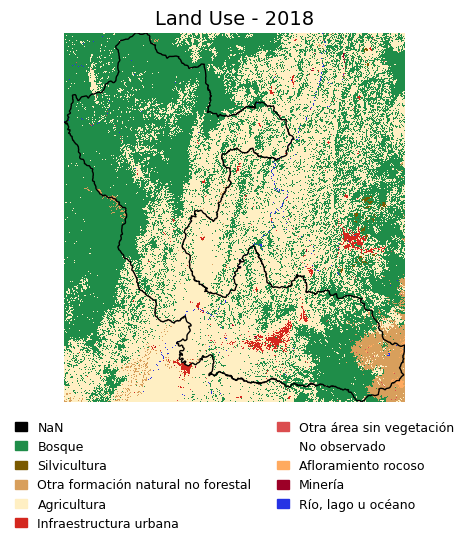

In [ ]:
fig, axis = plt.subplots(nrows=1, ncols=1)                                                # Crea figura y eje para la gráfica

values = [0., 3., 9., 13., 21., 24., 25., 27., 29., 30., 33., 34.]                        # Valores de categorías de uso del suelo
colors_list = ['#000000', '#1f8d49', '#7a5900', '#d89f5c', '#ffefc3', '#d4271e',          # Colores para cada categoría
               '#db4d4f', '#FFFFFF', '#ffaa5f', '#9c0027', '#2532e4', '#93dfe6']
labels = ['NaN', 'Bosque', 'Silvicultura', 'Otra formación natural no forestal',           # Etiquetas de categorías
          'Agricultura', 'Infraestructura urbana', 'Otra área sin vegetación',
          'No observado', 'Afloramiento rocoso', 'Minería', 'Río, lago u océano',
          'Glaciar']

cmap = colors.ListedColormap(colors_list)                                                  # Colormap personalizado
bounds = values + [256]                                                                    # Extiende bounds para todas las categorías
norm = colors.BoundaryNorm(bounds, cmap.N)                                                 # Normaliza colormap con bounds

raster_ris.plot.imshow(ax=axis, cmap=cmap, norm=norm, add_colorbar=False)                  # Dibuja imagen raster con colormap y normalización
roi.query("denombre == 'Risaralda'").plot(ax=axis, facecolor="none", edgecolor='black')    # Dibuja contorno de Risaralda

legend_patches = [mpatches.Patch(color=colors_list[i], label=labels[i]) for i in range(len(values)-1)]  # Leyenda con colores y etiquetas

plt.legend(handles=legend_patches, bbox_to_anchor=(0.5, -0.02), loc='upper center',        # Agrega leyenda centrada
           ncol=2, fontsize=9, handlelength=1, frameon=False)

plt.axis('off')                                                                            # Desactiva ejes
plt.title('Land Use - 2018', fontsize=14)                                                  # Título del gráfico

plt.show()

#### Año 2019

In [ ]:
path = "/content/drive/MyDrive/Proyecto aplicado /Variables Bioclimaticas/MapBiomas_Output_ris/mapbiomas_ris_2019.tif"
# path = "/content/drive/MyDrive/research/codes/Proyecto aplicado /Variables Bioclimaticas/MapBiomas_Output_ris/mapbiomas_ris_2019.tif"
raster_ris = rxr.open_rasterio(path, masked = True).squeeze()

In [ ]:
unique_values = np.unique(raster_ris)
unique_values

array([ 3.,  9., 13., 21., 24., 25., 27., 29., 30., 33., 34.],
      dtype=float32)

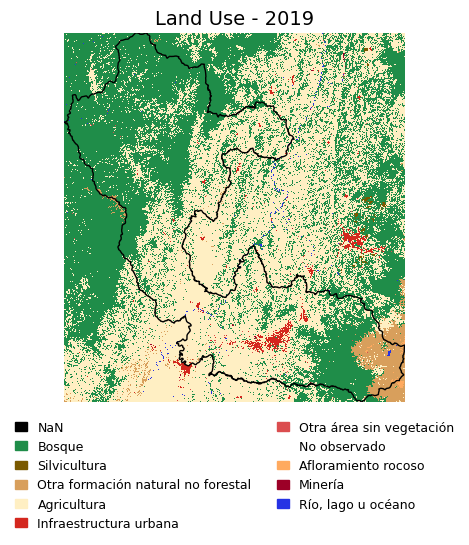

In [ ]:
fig, axis = plt.subplots(nrows=1, ncols=1)                                                # Crea figura y eje para la gráfica

values = [0., 3., 9., 13., 21., 24., 25., 27., 29., 30., 33., 34.]                        # Valores de categorías de uso del suelo
colors_list = ['#000000', '#1f8d49', '#7a5900', '#d89f5c', '#ffefc3', '#d4271e',          # Colores para cada categoría
               '#db4d4f', '#FFFFFF', '#ffaa5f', '#9c0027', '#2532e4', '#93dfe6']
labels = ['NaN', 'Bosque', 'Silvicultura', 'Otra formación natural no forestal',           # Etiquetas de categorías
          'Agricultura', 'Infraestructura urbana', 'Otra área sin vegetación',
          'No observado', 'Afloramiento rocoso', 'Minería', 'Río, lago u océano',
          'Glaciar']

cmap = colors.ListedColormap(colors_list)                                                  # Colormap personalizado
bounds = values + [256]                                                                    # Extiende bounds para todas las categorías
norm = colors.BoundaryNorm(bounds, cmap.N)                                                 # Normaliza colormap con bounds

raster_ris.plot.imshow(ax=axis, cmap=cmap, norm=norm, add_colorbar=False)                  # Dibuja imagen raster con colormap y normalización
roi.query("denombre == 'Risaralda'").plot(ax=axis, facecolor="none", edgecolor='black')    # Dibuja contorno de Risaralda

legend_patches = [mpatches.Patch(color=colors_list[i], label=labels[i]) for i in range(len(values)-1)]  # Leyenda con colores y etiquetas

plt.legend(handles=legend_patches, bbox_to_anchor=(0.5, -0.02), loc='upper center',        # Agrega leyenda centrada
           ncol=2, fontsize=9, handlelength=1, frameon=False)

plt.axis('off')                                                                            # Desactiva ejes
plt.title('Land Use - 2019', fontsize=14)

plt.show()

#### Año 2020

In [ ]:
path = "/content/drive/MyDrive/Proyecto aplicado /Variables Bioclimaticas/MapBiomas_Output_ris/mapbiomas_ris_2020.tif"
# Juan
# path = "/content/drive/MyDrive/research/codes/Proyecto aplicado /Variables Bioclimaticas/MapBiomas_Output_ris/mapbiomas_ris_2020.tif"
raster_ris = rxr.open_rasterio(path, masked = True).squeeze()

In [ ]:
unique_values = np.unique(raster_ris)

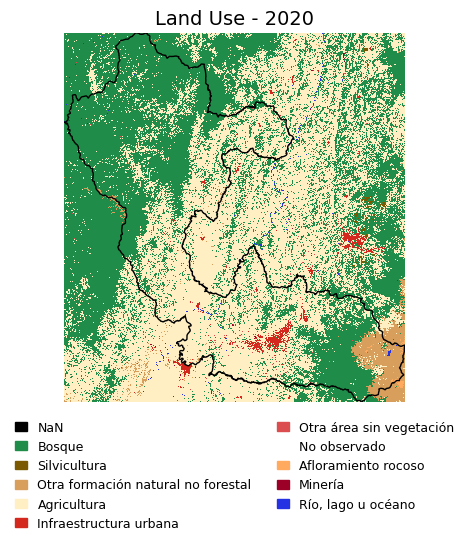

In [ ]:
fig, axis = plt.subplots(nrows=1, ncols=1)                                                # Crea figura y eje para la gráfica

values = [0., 3., 9., 13., 21., 24., 25., 27., 29., 30., 33., 34.]                        # Valores de categorías de uso del suelo
colors_list = ['#000000', '#1f8d49', '#7a5900', '#d89f5c', '#ffefc3', '#d4271e',          # Colores para cada categoría
               '#db4d4f', '#FFFFFF', '#ffaa5f', '#9c0027', '#2532e4', '#93dfe6']
labels = ['NaN', 'Bosque', 'Silvicultura', 'Otra formación natural no forestal',           # Etiquetas de categorías
          'Agricultura', 'Infraestructura urbana', 'Otra área sin vegetación',
          'No observado', 'Afloramiento rocoso', 'Minería', 'Río, lago u océano',
          'Glaciar']

cmap = colors.ListedColormap(colors_list)                                                  # Colormap personalizado
bounds = values + [256]                                                                    # Extiende bounds para todas las categorías
norm = colors.BoundaryNorm(bounds, cmap.N)                                                 # Normaliza colormap con bounds

raster_ris.plot.imshow(ax=axis, cmap=cmap, norm=norm, add_colorbar=False)                  # Dibuja imagen raster con colormap y normalización
roi.query("denombre == 'Risaralda'").plot(ax=axis, facecolor="none", edgecolor='black')    # Dibuja contorno de Risaralda

legend_patches = [mpatches.Patch(color=colors_list[i], label=labels[i]) for i in range(len(values)-1)]  # Leyenda con colores y etiquetas

plt.legend(handles=legend_patches, bbox_to_anchor=(0.5, -0.02), loc='upper center',        # Agrega leyenda centrada
           ncol=2, fontsize=9, handlelength=1, frameon=False)

plt.axis('off')                                                                            # Desactiva ejes
plt.title('Land Use - 2020', fontsize=14)                                                  # Título del gráfico

plt.show()

### Delimitación del área de interés con shapefile y se utiliza Goole Earth Enginer para acceder a MapBiomas en Antioquia

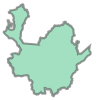

In [ ]:
# Departamentos: Colombia

# path = "/content/drive/MyDrive/research/codes/Proyecto aplicado /Departamentos_Junio_2024_shp/Departamento.shp"     # Ruta Juan Blandon
path = "/content/drive/MyDrive/Proyecto aplicado /Departamentos_Junio_2024_shp/Departamento.shp"                      # Ruta Victoria y Paula
roi = gpd.read_file(path, engine='pyogrio', use_arrow=True)                                                           # Lee shapefile como GeoDataFrame
roi = roi.clean_names()                                                                                               # Limpia nombres de columnas
roi = roi.to_crs(4326)                                                                                                # Convierte CRS a EPSG:4326
sta_roi_ant = roi.query("denombre == 'Antioquia'")                                                                    # Filtra geometría de Antioquia
sta_roi_ant = sta_roi_ant.geometry.iloc[0]                                                                            # Selecciona primera geometría de Antioquia
sta_roi_ant

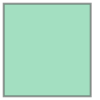

In [ ]:
# Construcción de una bounding box (caja delimitadora) a partir de la geometría seleccionada (Antioquia)

bbox_ant = sta_roi_ant.bounds           # Extrae límites de la geometría de Antioquia

# Bounding box definida por cuatro coordenadas: xmin, ymin, xmax, ymax
bbox_ant = Polygon([(bbox_ant[0], bbox_ant[1]), (bbox_ant[0], bbox_ant[3]), (bbox_ant[2], bbox_ant[3]), (bbox_ant[2], bbox_ant[1])])

bbox_xmin_ant = bbox_ant.bounds[0]
bbox_ymin_ant = bbox_ant.bounds[1]
bbox_xmax_ant = bbox_ant.bounds[2]
bbox_ymax_ant = bbox_ant.bounds[3]

bbox_ant

In [ ]:
# Accede a un activo de la colección MapBiomas para Colombia en Google Earth Engine

mapbiomas_asset = 'projects/mapbiomas-raisg/MAPBIOMAS-COLOMBIA/COLECCION1/INTEGRACION/integracion-pais/Integracion-COLOMBIA-3'
asset_properties = ee.data.getAsset(mapbiomas_asset)                                                                           # Obtiene propiedades del activo
asset_properties

{'type': 'IMAGE',
 'name': 'projects/earthengine-legacy/assets/projects/mapbiomas-raisg/MAPBIOMAS-COLOMBIA/COLECCION1/INTEGRACION/integracion-pais/Integracion-COLOMBIA-3',
 'id': 'projects/mapbiomas-raisg/MAPBIOMAS-COLOMBIA/COLECCION1/INTEGRACION/integracion-pais/Integracion-COLOMBIA-3',
 'properties': {'descripcion': 'filtro frecuencia general',
  'code_region': 30406,
  'paso': 'P07',
  'version': 3,
  'pais': 'COLOMBIA'},
 'updateTime': '2023-09-20T14:14:25.691315Z',
 'geometry': {'type': 'Polygon',
  'coordinates': [[[-88.22190260398155, 21.36970817397722],
    [-88.22188417373195, -6.055408940190116],
    [-87.62876182799094, -6.057664717387897],
    [-87.03563523390137, -6.059276166862931],
    [-86.44250580654337, -6.060243112060335],
    [-85.84937496220977, -6.060565447068736],
    [-85.25624411785822, -6.060243136566376],
    [-84.66311469041037, -6.0592762158660305],
    [-84.06998809618604, -6.057664790888053],
    [-83.4768657502564, -6.055409038169364],
    [-83.002393591

### Recortar la imagen de MapBiomas a la región de interés (Roi - Antioquia), y seleccionar una banda correspondiente al año de requerido

In [ ]:
# Lista de años de interés
years = [2014, 2015, 2016, 2017, 2018, 2019, 2020]

# Directorio de exportación de imágenes
output_dir = "/content/drive/MyDrive/Proyecto aplicado /Variables Bioclimaticas/MapBiomas_Output_ant"
# Juan
# output_dir = "/content/drive/MyDrive/research/codes/Proyecto aplicado /Variables Bioclimaticas/MapBiomas_Output_ant"
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# Ciclo para exportar imágenes de cada año
for year in years:
    band_id = f'classification_{year}'

    mapbiomas_image = ee.Image(mapbiomas_asset)   # Objeto de imagen GEE a partir de MapBiomas
    mapbiomas_year = mapbiomas_image.select(band_id)

    sta_roi_ant = ee.Geometry.Rectangle([bbox_xmin_ant, bbox_ymin_ant, bbox_xmax_ant, bbox_ymax_ant]) # Define la región de interés (ROI)
    image_roi_ant = mapbiomas_year.clip(sta_roi_ant)                                                   # Recorta la imagen a la ROI

    # Nombre del archivo TIFF para cada año
    filename = f'mapbiomas_ant_{year}.tif'
    output_path = os.path.join(output_dir, filename)  # Ruta de guardado

    # Exporta la imagen usando geemap.ee_export_image
    geemap.ee_export_image(
        image_roi_ant, filename=output_path, scale=90, region=sta_roi_ant.getInfo()['coordinates']
    )

    # Confirmación de exportación
    print(f'Exportando imagen para el año {year} con el nombre {output_path}')


Generating URL ...
Please wait ...
Data downloaded to /content/drive/MyDrive/Proyecto aplicado /Variables Bioclimaticas/MapBiomas_Output_ant/mapbiomas_ant_2014.tif
Exportando imagen para el año 2014 con el nombre /content/drive/MyDrive/Proyecto aplicado /Variables Bioclimaticas/MapBiomas_Output_ant/mapbiomas_ant_2014.tif
Generating URL ...
Please wait ...
Data downloaded to /content/drive/MyDrive/Proyecto aplicado /Variables Bioclimaticas/MapBiomas_Output_ant/mapbiomas_ant_2015.tif
Exportando imagen para el año 2015 con el nombre /content/drive/MyDrive/Proyecto aplicado /Variables Bioclimaticas/MapBiomas_Output_ant/mapbiomas_ant_2015.tif
Generating URL ...
Please wait ...
Data downloaded to /content/drive/MyDrive/Proyecto aplicado /Variables Bioclimaticas/MapBiomas_Output_ant/mapbiomas_ant_2016.tif
Exportando imagen para el año 2016 con el nombre /content/drive/MyDrive/Proyecto aplicado /Variables Bioclimaticas/MapBiomas_Output_ant/mapbiomas_ant_2016.tif
Generating URL ...
Please wait 

#### Año 2014

In [ ]:
Map = geemap.Map()
Map.addLayer(image_roi_ant, {}, "MapBiomas Colombia_2014")
Map

Map(center=[0, 0], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=SearchDataGUI(childr…

In [ ]:
path = "/content/drive/MyDrive/Proyecto aplicado /Variables Bioclimaticas/MapBiomas_Output_ant/mapbiomas_ant_2014.tif"
# Juan
# path = "/content/drive/MyDrive/research/codes/Proyecto aplicado /Variables Bioclimaticas/MapBiomas_Output_ant/mapbiomas_ant_2014.tif"
raster_ant = rxr.open_rasterio(path, masked = True).squeeze()

In [ ]:
unique_values_ant = np.unique(raster_ant)
unique_values_ant

array([ 3.,  5.,  6.,  9., 11., 13., 21., 23., 24., 25., 27., 30., 31.,
       33., 35., nan], dtype=float32)

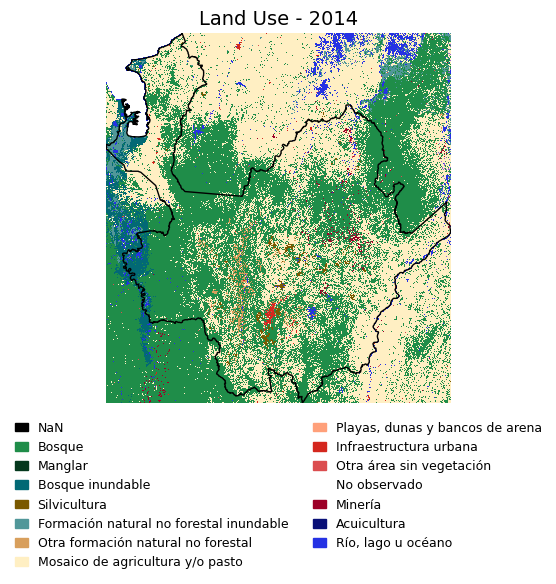

In [ ]:
fig, axis = plt.subplots(nrows=1, ncols=1)                                                # Crea figura y eje para la gráfica

values = [0., 3., 5., 6., 9., 11., 13., 21., 23., 24., 25., 27., 30., 31., 33., 35.]      # Valores de categorías de uso del suelo
colors_list = ['#000000', '#1f8d49', '#04381D', '#026975', '#7A5900', '#519799',          # Colores para cada categoría
               '#D89F5C', '#FFEFC3', '#FFA07A', '#D4271E', '#DB4D4F', '#FFFFFF',
               '#9C0027', '#091077', '#2532E4', '#9065D0']
labels = ['NaN', 'Bosque', 'Manglar', 'Bosque inundable', 'Silvicultura',                 # Etiquetas de categorías
          'Formación natural no forestal inundable', 'Otra formación natural no forestal',
          'Mosaico de agricultura y/o pasto', 'Playas, dunas y bancos de arena', 'Infraestructura urbana', 'Otra área sin vegetación',
          'No observado', 'Minería', 'Acuicultura', 'Río, lago u océano', 'Palma aceitera']

cmap = colors.ListedColormap(colors_list)                                                  # Colormap personalizado
bounds = values + [256]                                                                    # Extiende bounds para todas las categorías
norm = colors.BoundaryNorm(bounds, cmap.N)                                                 # Normaliza colormap con bounds

raster_ant.plot.imshow(ax=axis, cmap=cmap, norm=norm, add_colorbar=False)                  # Dibuja imagen raster con colormap y normalización
roi.query("denombre == 'Antioquia'").plot(ax=axis, facecolor="none", edgecolor='black')    # Dibuja contorno de Antioquia

legend_patches = [mpatches.Patch(color=colors_list[i], label=labels[i]) for i in range(len(values)-1)]  # Leyenda con colores y etiquetas

plt.legend(handles=legend_patches, bbox_to_anchor=(0.5, -0.02), loc='upper center',        # Agrega leyenda centrada
           ncol=2, fontsize=9, handlelength=1, frameon=False)

plt.axis('off')                                                                            # Desactiva ejes
plt.title('Land Use - 2014', fontsize=14)                                                  # Título del gráfico

plt.show()

#### Año 2015

In [ ]:
path = "/content/drive/MyDrive/Proyecto aplicado /Variables Bioclimaticas/MapBiomas_Output_ant/mapbiomas_ant_2015.tif"
# Juan
# path = "/content/drive/MyDrive/research/codes/Proyecto aplicado /Variables Bioclimaticas/MapBiomas_Output_ant/mapbiomas_ant_2015.tif"
raster_ant = rxr.open_rasterio(path, masked = True).squeeze()

In [ ]:
unique_values_ant = np.unique(raster_ant)
unique_values_ant

array([ 3.,  5.,  6.,  9., 11., 13., 21., 23., 24., 25., 27., 29., 30.,
       31., 33., 35., nan], dtype=float32)

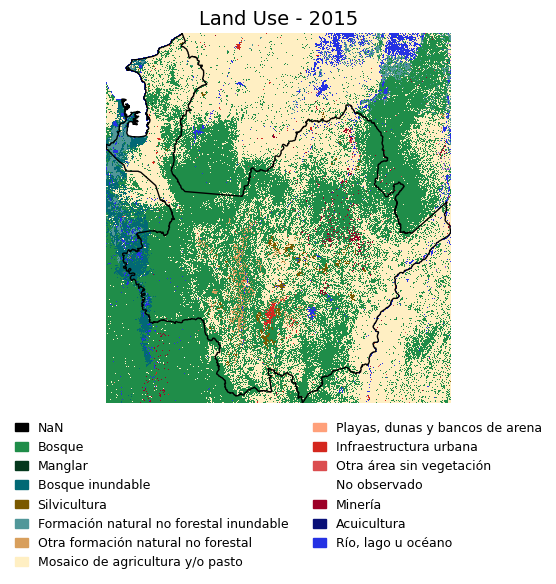

In [ ]:
fig, axis = plt.subplots(nrows=1, ncols=1)                                                # Crea figura y eje para la gráfica

values = [0., 3., 5., 6., 9., 11., 13., 21., 23., 24., 25., 27., 30., 31., 33., 35.]      # Valores de categorías de uso del suelo
colors_list = ['#000000', '#1f8d49', '#04381D', '#026975', '#7A5900', '#519799',          # Colores para cada categoría
               '#D89F5C', '#FFEFC3', '#FFA07A', '#D4271E', '#DB4D4F', '#FFFFFF',
               '#9C0027', '#091077', '#2532E4', '#9065D0']
labels = ['NaN', 'Bosque', 'Manglar', 'Bosque inundable', 'Silvicultura',                 # Etiquetas de categorías
          'Formación natural no forestal inundable', 'Otra formación natural no forestal',
          'Mosaico de agricultura y/o pasto', 'Playas, dunas y bancos de arena', 'Infraestructura urbana', 'Otra área sin vegetación',
          'No observado', 'Minería', 'Acuicultura', 'Río, lago u océano', 'Palma aceitera']

cmap = colors.ListedColormap(colors_list)                                                  # Colormap personalizado
bounds = values + [256]                                                                    # Extiende bounds para todas las categorías
norm = colors.BoundaryNorm(bounds, cmap.N)                                                 # Normaliza colormap con bounds

raster_ant.plot.imshow(ax=axis, cmap=cmap, norm=norm, add_colorbar=False)                  # Dibuja imagen raster con colormap y normalización
roi.query("denombre == 'Antioquia'").plot(ax=axis, facecolor="none", edgecolor='black')    # Dibuja contorno de Antioquia

legend_patches = [mpatches.Patch(color=colors_list[i], label=labels[i]) for i in range(len(values)-1)]  # Leyenda con colores y etiquetas

plt.legend(handles=legend_patches, bbox_to_anchor=(0.5, -0.02), loc='upper center',        # Agrega leyenda centrada
           ncol=2, fontsize=9, handlelength=1, frameon=False)

plt.axis('off')                                                                            # Desactiva ejes
plt.title('Land Use - 2015', fontsize=14)                                                  # Título del gráfico

plt.show()

#### Año 2016

In [ ]:
path = "/content/drive/MyDrive/Proyecto aplicado /Variables Bioclimaticas/MapBiomas_Output_ant/mapbiomas_ant_2016.tif"
# Juan
# path = "/content/drive/MyDrive/research/codes/Proyecto aplicado /Variables Bioclimaticas/MapBiomas_Output_ant/mapbiomas_ant_2016.tif"
raster_ant = rxr.open_rasterio(path, masked = True).squeeze()

In [ ]:
unique_values_ant = np.unique(raster_ant)
unique_values_ant

array([ 3.,  5.,  6.,  9., 11., 13., 21., 23., 24., 25., 27., 29., 30.,
       31., 33., 35., nan], dtype=float32)

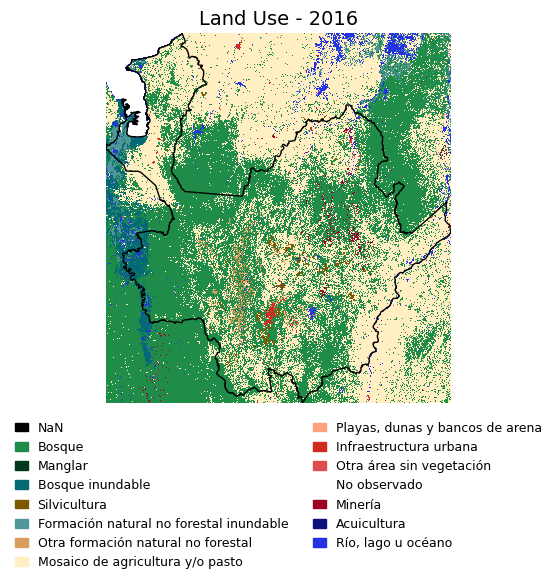

In [ ]:
fig, axis = plt.subplots(nrows=1, ncols=1)                                                # Crea figura y eje para la gráfica

values = [0., 3., 5., 6., 9., 11., 13., 21., 23., 24., 25., 27., 30., 31., 33., 35.]      # Valores de categorías de uso del suelo
colors_list = ['#000000', '#1f8d49', '#04381D', '#026975', '#7A5900', '#519799',          # Colores para cada categoría
               '#D89F5C', '#FFEFC3', '#FFA07A', '#D4271E', '#DB4D4F', '#FFFFFF',
               '#9C0027', '#091077', '#2532E4', '#9065D0']
labels = ['NaN', 'Bosque', 'Manglar', 'Bosque inundable', 'Silvicultura',                 # Etiquetas de categorías
          'Formación natural no forestal inundable', 'Otra formación natural no forestal',
          'Mosaico de agricultura y/o pasto', 'Playas, dunas y bancos de arena', 'Infraestructura urbana', 'Otra área sin vegetación',
          'No observado', 'Minería', 'Acuicultura', 'Río, lago u océano', 'Palma aceitera']

cmap = colors.ListedColormap(colors_list)                                                  # Colormap personalizado
bounds = values + [256]                                                                    # Extiende bounds para todas las categorías
norm = colors.BoundaryNorm(bounds, cmap.N)                                                 # Normaliza colormap con bounds

raster_ant.plot.imshow(ax=axis, cmap=cmap, norm=norm, add_colorbar=False)                  # Dibuja imagen raster con colormap y normalización
roi.query("denombre == 'Antioquia'").plot(ax=axis, facecolor="none", edgecolor='black')    # Dibuja contorno de Antioquia

legend_patches = [mpatches.Patch(color=colors_list[i], label=labels[i]) for i in range(len(values)-1)]  # Leyenda con colores y etiquetas

plt.legend(handles=legend_patches, bbox_to_anchor=(0.5, -0.02), loc='upper center',        # Agrega leyenda centrada
           ncol=2, fontsize=9, handlelength=1, frameon=False)

plt.axis('off')                                                                            # Desactiva ejes
plt.title('Land Use - 2016', fontsize=14)                                                  # Título del gráfico

plt.show()

#### Año 2017

In [ ]:
path = "/content/drive/MyDrive/Proyecto aplicado /Variables Bioclimaticas/MapBiomas_Output_ant/mapbiomas_ant_2017.tif"
# Juan
# path = "/content/drive/MyDrive/research/codes/Proyecto aplicado /Variables Bioclimaticas/MapBiomas_Output_ant/mapbiomas_ant_2017.tif"
raster_ant = rxr.open_rasterio(path, masked = True).squeeze()

In [ ]:
unique_values_ant = np.unique(raster_ant)

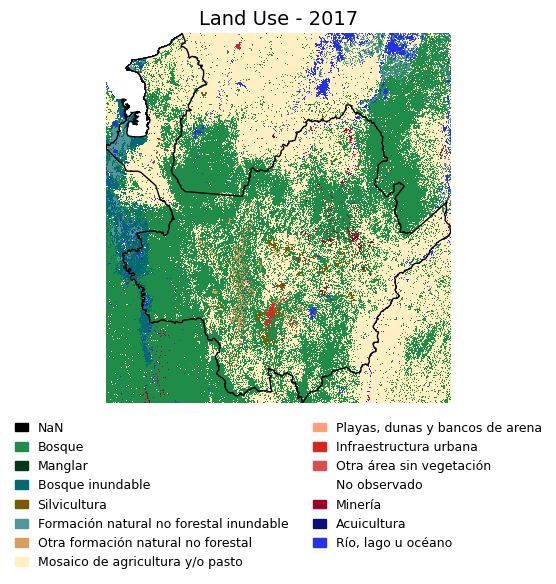

In [ ]:
fig, axis = plt.subplots(nrows=1, ncols=1)                                                # Crea figura y eje para la gráfica

values = [0., 3., 5., 6., 9., 11., 13., 21., 23., 24., 25., 27., 30., 31., 33., 35.]      # Valores de categorías de uso del suelo
colors_list = ['#000000', '#1f8d49', '#04381D', '#026975', '#7A5900', '#519799',          # Colores para cada categoría
               '#D89F5C', '#FFEFC3', '#FFA07A', '#D4271E', '#DB4D4F', '#FFFFFF',
               '#9C0027', '#091077', '#2532E4', '#9065D0']
labels = ['NaN', 'Bosque', 'Manglar', 'Bosque inundable', 'Silvicultura',                 # Etiquetas de categorías
          'Formación natural no forestal inundable', 'Otra formación natural no forestal',
          'Mosaico de agricultura y/o pasto', 'Playas, dunas y bancos de arena', 'Infraestructura urbana', 'Otra área sin vegetación',
          'No observado', 'Minería', 'Acuicultura', 'Río, lago u océano', 'Palma aceitera']

cmap = colors.ListedColormap(colors_list)                                                  # Colormap personalizado
bounds = values + [256]                                                                    # Extiende bounds para todas las categorías
norm = colors.BoundaryNorm(bounds, cmap.N)                                                 # Normaliza colormap con bounds

raster_ant.plot.imshow(ax=axis, cmap=cmap, norm=norm, add_colorbar=False)                  # Dibuja imagen raster con colormap y normalización
roi.query("denombre == 'Antioquia'").plot(ax=axis, facecolor="none", edgecolor='black')    # Dibuja contorno de Antioquia

legend_patches = [mpatches.Patch(color=colors_list[i], label=labels[i]) for i in range(len(values)-1)]  # Leyenda con colores y etiquetas

plt.legend(handles=legend_patches, bbox_to_anchor=(0.5, -0.02), loc='upper center',        # Agrega leyenda centrada
           ncol=2, fontsize=9, handlelength=1, frameon=False)

plt.axis('off')                                                                            # Desactiva ejes
plt.title('Land Use - 2017', fontsize=14)                                                  # Título del gráfico

plt.show()

#### Año 2018

In [ ]:
path = "/content/drive/MyDrive/Proyecto aplicado /Variables Bioclimaticas/MapBiomas_Output_ant/mapbiomas_ant_2018.tif"
# Juan
# path = "/content/drive/MyDrive/research/codes/Proyecto aplicado /Variables Bioclimaticas/MapBiomas_Output_ant/mapbiomas_ant_2018.tif"
raster_ant = rxr.open_rasterio(path, masked = True).squeeze()

In [ ]:
unique_values_ant = np.unique(raster_ant)

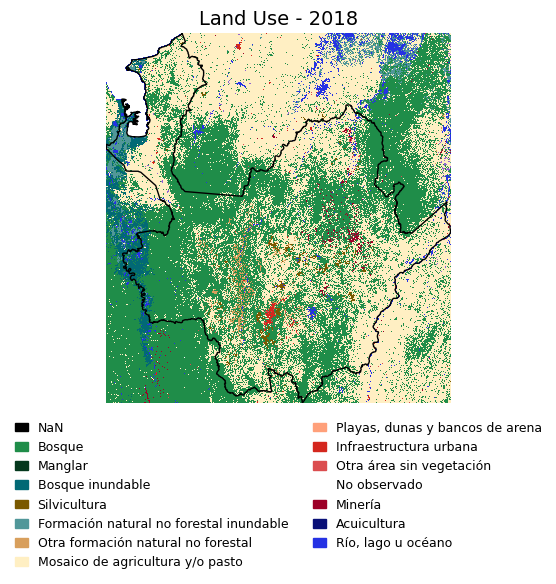

In [ ]:
fig, axis = plt.subplots(nrows=1, ncols=1)                                                # Crea figura y eje para la gráfica

values = [0., 3., 5., 6., 9., 11., 13., 21., 23., 24., 25., 27., 30., 31., 33., 35.]      # Valores de categorías de uso del suelo
colors_list = ['#000000', '#1f8d49', '#04381D', '#026975', '#7A5900', '#519799',          # Colores para cada categoría
               '#D89F5C', '#FFEFC3', '#FFA07A', '#D4271E', '#DB4D4F', '#FFFFFF',
               '#9C0027', '#091077', '#2532E4', '#9065D0']
labels = ['NaN', 'Bosque', 'Manglar', 'Bosque inundable', 'Silvicultura',                 # Etiquetas de categorías
          'Formación natural no forestal inundable', 'Otra formación natural no forestal',
          'Mosaico de agricultura y/o pasto', 'Playas, dunas y bancos de arena', 'Infraestructura urbana', 'Otra área sin vegetación',
          'No observado', 'Minería', 'Acuicultura', 'Río, lago u océano', 'Palma aceitera']

cmap = colors.ListedColormap(colors_list)                                                  # Colormap personalizado
bounds = values + [256]                                                                    # Extiende bounds para todas las categorías
norm = colors.BoundaryNorm(bounds, cmap.N)                                                 # Normaliza colormap con bounds

raster_ant.plot.imshow(ax=axis, cmap=cmap, norm=norm, add_colorbar=False)                  # Dibuja imagen raster con colormap y normalización
roi.query("denombre == 'Antioquia'").plot(ax=axis, facecolor="none", edgecolor='black')    # Dibuja contorno de Antioquia

legend_patches = [mpatches.Patch(color=colors_list[i], label=labels[i]) for i in range(len(values)-1)]  # Leyenda con colores y etiquetas

plt.legend(handles=legend_patches, bbox_to_anchor=(0.5, -0.02), loc='upper center',        # Agrega leyenda centrada
           ncol=2, fontsize=9, handlelength=1, frameon=False)

plt.axis('off')                                                                            # Desactiva ejes
plt.title('Land Use - 2018', fontsize=14)                                                  # Título del gráfico

plt.show()

#### Año 2019

In [ ]:
path = "/content/drive/MyDrive/Proyecto aplicado /Variables Bioclimaticas/MapBiomas_Output_ant/mapbiomas_ant_2019.tif"
# Juan
# path = "/content/drive/MyDrive/research/codes/Proyecto aplicado /Variables Bioclimaticas/MapBiomas_Output_ant/mapbiomas_ant_2019.tif"
raster_ant = rxr.open_rasterio(path, masked = True).squeeze()

In [ ]:
unique_values_ant = np.unique(raster_ant)
unique_values_ant

array([ 3.,  5.,  6.,  9., 11., 13., 21., 23., 24., 25., 27., 29., 30.,
       31., 33., 35., nan], dtype=float32)

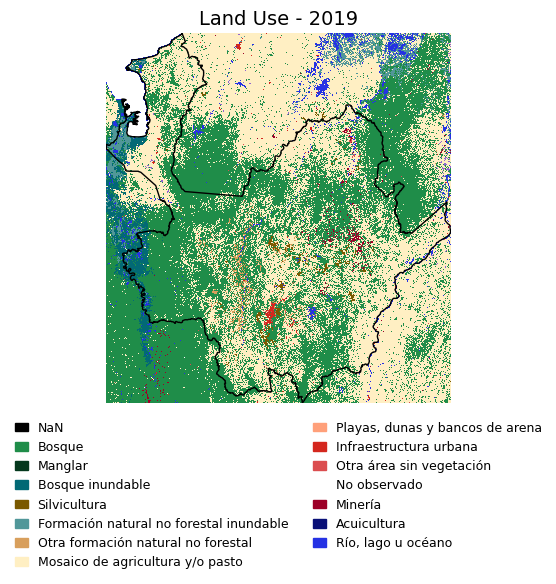

In [ ]:
fig, axis = plt.subplots(nrows=1, ncols=1)                                                # Crea figura y eje para la gráfica

values = [0., 3., 5., 6., 9., 11., 13., 21., 23., 24., 25., 27., 30., 31., 33., 35.]      # Valores de categorías de uso del suelo
colors_list = ['#000000', '#1f8d49', '#04381D', '#026975', '#7A5900', '#519799',          # Colores para cada categoría
               '#D89F5C', '#FFEFC3', '#FFA07A', '#D4271E', '#DB4D4F', '#FFFFFF',
               '#9C0027', '#091077', '#2532E4', '#9065D0']
labels = ['NaN', 'Bosque', 'Manglar', 'Bosque inundable', 'Silvicultura',                 # Etiquetas de categorías
          'Formación natural no forestal inundable', 'Otra formación natural no forestal',
          'Mosaico de agricultura y/o pasto', 'Playas, dunas y bancos de arena', 'Infraestructura urbana', 'Otra área sin vegetación',
          'No observado', 'Minería', 'Acuicultura', 'Río, lago u océano', 'Palma aceitera']

cmap = colors.ListedColormap(colors_list)                                                  # Colormap personalizado
bounds = values + [256]                                                                    # Extiende bounds para todas las categorías
norm = colors.BoundaryNorm(bounds, cmap.N)                                                 # Normaliza colormap con bounds

raster_ant.plot.imshow(ax=axis, cmap=cmap, norm=norm, add_colorbar=False)                  # Dibuja imagen raster con colormap y normalización
roi.query("denombre == 'Antioquia'").plot(ax=axis, facecolor="none", edgecolor='black')    # Dibuja contorno de Antioquia

legend_patches = [mpatches.Patch(color=colors_list[i], label=labels[i]) for i in range(len(values)-1)]  # Leyenda con colores y etiquetas

plt.legend(handles=legend_patches, bbox_to_anchor=(0.5, -0.02), loc='upper center',        # Agrega leyenda centrada
           ncol=2, fontsize=9, handlelength=1, frameon=False)

plt.axis('off')                                                                            # Desactiva ejes
plt.title('Land Use - 2019', fontsize=14)                                                  # Título del gráfico

plt.show()

#### Año 2020

In [ ]:
path = "/content/drive/MyDrive/Proyecto aplicado /Variables Bioclimaticas/MapBiomas_Output_ant/mapbiomas_ant_2020.tif"
# Juan
# path = "/content/drive/MyDrive/research/codes/Proyecto aplicado /Variables Bioclimaticas/MapBiomas_Output_ant/mapbiomas_ant_2020.tif"
raster_ant = rxr.open_rasterio(path, masked = True).squeeze()

In [ ]:
unique_values_ant = np.unique(raster_ant)
unique_values_ant

array([ 3.,  5.,  6.,  9., 11., 13., 21., 23., 24., 25., 27., 29., 30.,
       31., 33., 35., nan], dtype=float32)

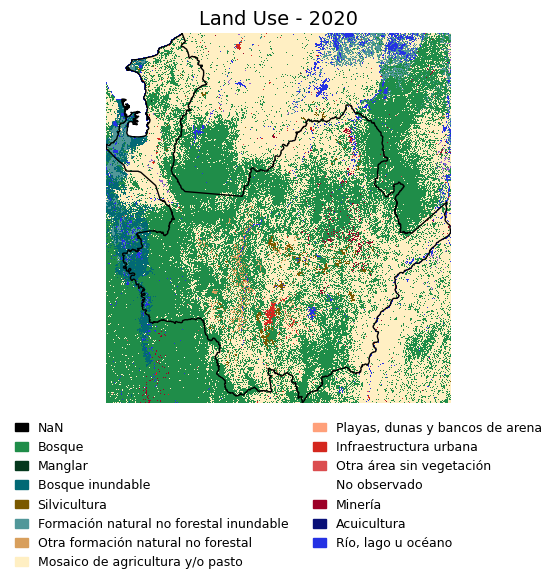

In [ ]:
fig, axis = plt.subplots(nrows=1, ncols=1)                                                # Crea figura y eje para la gráfica

values = [0., 3., 5., 6., 9., 11., 13., 21., 23., 24., 25., 27., 30., 31., 33., 35.]      # Valores de categorías de uso del suelo
colors_list = ['#000000', '#1f8d49', '#04381D', '#026975', '#7A5900', '#519799',          # Colores para cada categoría
               '#D89F5C', '#FFEFC3', '#FFA07A', '#D4271E', '#DB4D4F', '#FFFFFF',
               '#9C0027', '#091077', '#2532E4', '#9065D0']
labels = ['NaN', 'Bosque', 'Manglar', 'Bosque inundable', 'Silvicultura',                 # Etiquetas de categorías
          'Formación natural no forestal inundable', 'Otra formación natural no forestal',
          'Mosaico de agricultura y/o pasto', 'Playas, dunas y bancos de arena', 'Infraestructura urbana', 'Otra área sin vegetación',
          'No observado', 'Minería', 'Acuicultura', 'Río, lago u océano', 'Palma aceitera']

cmap = colors.ListedColormap(colors_list)                                                  # Colormap personalizado
bounds = values + [256]                                                                    # Extiende bounds para todas las categorías
norm = colors.BoundaryNorm(bounds, cmap.N)                                                 # Normaliza colormap con bounds

raster_ant.plot.imshow(ax=axis, cmap=cmap, norm=norm, add_colorbar=False)                  # Dibuja imagen raster con colormap y normalización
roi.query("denombre == 'Antioquia'").plot(ax=axis, facecolor="none", edgecolor='black')    # Dibuja contorno de Antioquia

legend_patches = [mpatches.Patch(color=colors_list[i], label=labels[i]) for i in range(len(values)-1)]  # Leyenda con colores y etiquetas

plt.legend(handles=legend_patches, bbox_to_anchor=(0.5, -0.02), loc='upper center',        # Agrega leyenda centrada
           ncol=2, fontsize=9, handlelength=1, frameon=False)

plt.axis('off')                                                                            # Desactiva ejes
plt.title('Land Use - 2020', fontsize=14)                                                  # Título del gráfico

plt.show()

## World Clim

WorldClim V1 Bioclim incluye 19 variables bioclimáticas derivadas de datos de temperatura y precipitación:

* Bio1: Temperatura media anual.
* Bio2: Rango de temperatura diurno medio.
* Bio3: Isotermalidad.
* Bio4: Estacionalidad de la temperatura (desviación estándar).
* Bio5: Temperatura máxima del mes más cálido.
* Bio6: Temperatura mínima del mes más frío.
* Bio7: Rango de temperatura anual.
* Bio8: Temperatura media del trimestre más húmedo.
* Bio9: Temperatura media del trimestre más seco.
* Bio10: Temperatura media del trimestre más cálido.
* Bio11: Temperatura media del trimestre más frío.
* Bio12: Precipitación anual.
* Bio13: Precipitación del mes más húmedo.
* Bio14: Precipitación del mes más seco.
* Bio15: Estacionalidad de la precipitación.
* Bio16: Precipitación del trimestre más húmedo.
* Bio17: Precipitación del trimestre más seco.
* Bio18: Precipitación del trimestre más cálido.
* Bio19: Precipitación del trimestre más frío.

### Risaralda

#### Variables climaticas

In [ ]:
# Descarga de datos BioClim
download = WorldClim(res='2.5', var='bio')         # Clase para descargar datos bioclimáticos de WorldClim con resolución 2.5
download.url_generation()                          # Genera URLs para la descarga de datos

In [ ]:
# Victoria
shp = "/content/drive/MyDrive/Proyecto aplicado /Departamentos_Junio_2024_shp/Departamento.shp"

# Juan
#shp = "/content/drive/MyDrive/research/codes/Proyecto aplicado /Departamentos_Junio_2024_shp/Departamento.shp"

roi = gpd.read_file(shp, engine='pyogrio', use_arrow=True)

roi = roi.clean_names()
roi = roi.to_crs(4326)                                          # Convierte CRS a EPSG:4326
sta_roi_ris = roi.query("denombre == 'Risaralda'")

# Crea el bounding box
sta_roi_ris.loc[7, 'geometry'] = box(*sta_roi_ris.total_bounds)


In [ ]:
# Victoria
output_dir = "/content/drive/MyDrive/Proyecto aplicado /Variables Bioclimaticas/WorldClim_Output_ris"

# Juan
# output_dir = "/content/drive/MyDrive/research/codes/Proyecto aplicado /Variables Bioclimaticas/WorldClim_Output_ris"
if not os.path.exists(output_dir):
    os.makedirs(output_dir)  # Crear el directorio si no existe

files_lst = natsorted(glob.glob("/content/wc2.1_2.5m_bio/*"))

bc_vars_lst = []

# Cargar y recortar imágenes bioclimáticas a la región de interés
for i in files_lst:
    bc_vars_lst += [bio_raster_loading(i, sta_roi_ris)]

# Exportar cada variable bioclimática como GeoTIFF
for idx, var in enumerate(bc_vars_lst):
    output_path = os.path.join(output_dir, f'worldclim_bio_{idx+1}.tif')
    var.rio.to_raster(output_path)  # Guardar como GeoTIFF
    print(f"Variable {idx+1} exportada a {output_path}")


Raster clipping done!
Raster clipping done!
Raster clipping done!
Raster clipping done!
Raster clipping done!
Raster clipping done!
Raster clipping done!
Raster clipping done!
Raster clipping done!
Raster clipping done!
Raster clipping done!
Raster clipping done!
Raster clipping done!
Raster clipping done!
Raster clipping done!
Raster clipping done!
Raster clipping done!
Raster clipping done!
Raster clipping done!
Variable 1 exportada a /content/drive/MyDrive/Proyecto aplicado /Variables Bioclimaticas/WorldClim_Output_ris/worldclim_bio_1.tif
Variable 2 exportada a /content/drive/MyDrive/Proyecto aplicado /Variables Bioclimaticas/WorldClim_Output_ris/worldclim_bio_2.tif
Variable 3 exportada a /content/drive/MyDrive/Proyecto aplicado /Variables Bioclimaticas/WorldClim_Output_ris/worldclim_bio_3.tif
Variable 4 exportada a /content/drive/MyDrive/Proyecto aplicado /Variables Bioclimaticas/WorldClim_Output_ris/worldclim_bio_4.tif
Variable 5 exportada a /content/drive/MyDrive/Proyecto aplicad

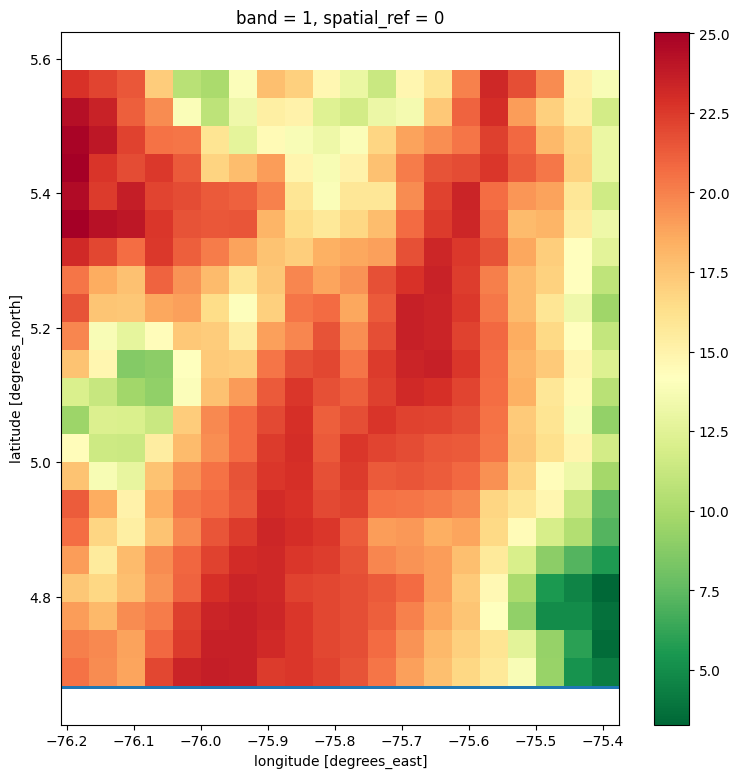

In [ ]:
f, ax = plt.subplots(figsize=(9,9))
plt.axis('equal')
sta_roi_ris.plot(ax=ax)
bc_vars_lst[0].plot(ax=ax, cmap='RdYlGn_r')

#### Elevación

In [ ]:
# Para la elevación
download = WorldClim(res = '2.5', var = 'elev')
download.url_generation()

In [ ]:
# Victoria
output_dir = "/content/drive/MyDrive/Proyecto aplicado /Variables Bioclimaticas/Elevation_Output_ris"

# Juan
# output_dir = "/content/drive/MyDrive/research/codes/Proyecto aplicado /Variables Bioclimaticas/Elevation_Output_ris"
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

files_lst = natsorted(glob.glob("/content/wc2.1_2.5m_elev/*"))
bc_vars_lst = []

# Cargar y recortar imágenes bioclimáticas a la región de interés
for i in files_lst:
    bc_vars_lst += [bio_raster_loading(i, sta_roi_ris)]

# Exportar cada variable bioclimática como GeoTIFF
for idx, var in enumerate(bc_vars_lst):
    output_path = os.path.join(output_dir, f'elevation_{idx+1}.tif')
    var.rio.to_raster(output_path)  # Guardar como GeoTIFF
    print(f"Variable {idx+1} exportada a {output_path}")


Raster clipping done!
Variable 1 exportada a /content/drive/MyDrive/Proyecto aplicado /Variables Bioclimaticas/Elevation_Output_ris/elevation_1.tif


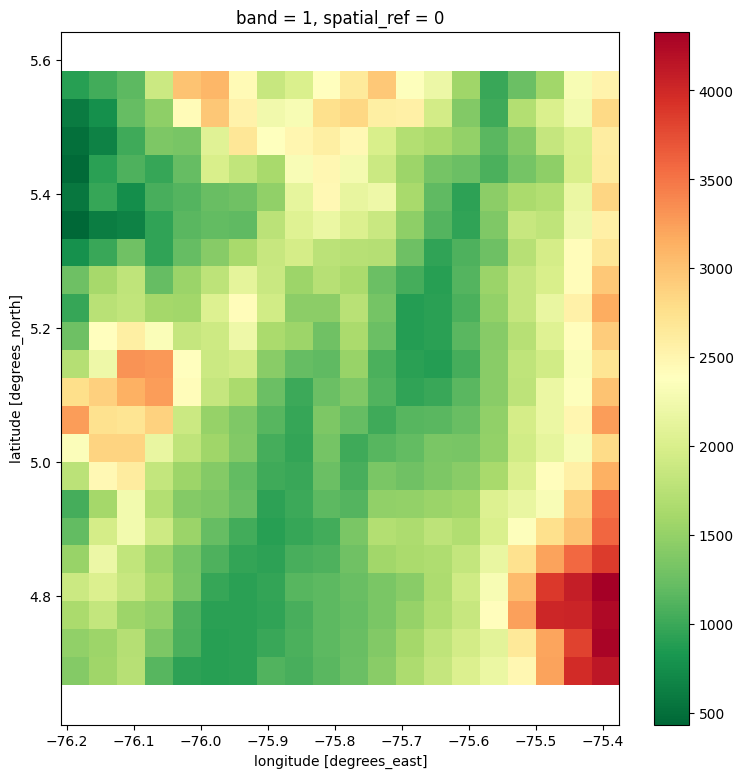

In [ ]:
f, ax = plt.subplots(figsize=(9,9))
plt.axis('equal')
bc_vars_lst[0].plot(ax=ax, cmap='RdYlGn_r')

### Antioquia

#### Variables climaticas

In [ ]:
# Descarga de datos BioClim
download = WorldClim(res='2.5', var='bio')         # Clase para descargar datos bioclimáticos de WorldClim (resolución 2.5)
download.url_generation()                          # Genera URLs para la descarga de datos

In [ ]:
# Victoria
shp = "/content/drive/MyDrive/Proyecto aplicado /Departamentos_Junio_2024_shp/Departamento.shp"

# Juan
# shp = "/content/drive/MyDrive/research/codes/Proyecto aplicado /Departamentos_Junio_2024_shp/Departamento.shp"

roi = gpd.read_file(shp, engine='pyogrio', use_arrow=True)

roi = roi.clean_names()
roi = roi.to_crs(4326)                                          # Convierte CRS a EPSG:4326
sta_roi_ant = roi.query("denombre == 'Antioquia'")

# Crear bounding box
sta_roi_ant.loc[7, 'geometry'] = box(*sta_roi_ant.total_bounds)

In [ ]:
# Victoria
output_dir = "/content/drive/MyDrive/Proyecto aplicado /Variables Bioclimaticas/WorldClim_Output_ant"

# Juan
# output_dir = "/content/drive/MyDrive/research/codes/Proyecto aplicado /Variables Bioclimaticas/WorldClim_Output_ant"
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# Cargar y procesar variables de WorldClim
files_lst = natsorted(glob.glob("/content/wc2.1_2.5m_bio/*"))
bc_vars_lst = []

# Cargar y recortar imágenes bioclimáticas a la región de interés
for i in files_lst:
    bc_vars_lst += [bio_raster_loading(i, sta_roi_ant)]

# Exportar cada variable bioclimática como GeoTIFF
for idx, var in enumerate(bc_vars_lst):
    output_path = os.path.join(output_dir, f'worldclim_bio_{idx+1}.tif')
    var.rio.to_raster(output_path)
    print(f"Variable {idx+1} exportada a {output_path}")

Raster clipping done!
Raster clipping done!
Raster clipping done!
Raster clipping done!
Raster clipping done!
Raster clipping done!
Raster clipping done!
Raster clipping done!
Raster clipping done!
Raster clipping done!
Raster clipping done!
Raster clipping done!
Raster clipping done!
Raster clipping done!
Raster clipping done!
Raster clipping done!
Raster clipping done!
Raster clipping done!
Raster clipping done!
Variable 1 exportada a /content/drive/MyDrive/Proyecto aplicado /Variables Bioclimaticas/WorldClim_Output_ant/worldclim_bio_1.tif
Variable 2 exportada a /content/drive/MyDrive/Proyecto aplicado /Variables Bioclimaticas/WorldClim_Output_ant/worldclim_bio_2.tif
Variable 3 exportada a /content/drive/MyDrive/Proyecto aplicado /Variables Bioclimaticas/WorldClim_Output_ant/worldclim_bio_3.tif
Variable 4 exportada a /content/drive/MyDrive/Proyecto aplicado /Variables Bioclimaticas/WorldClim_Output_ant/worldclim_bio_4.tif
Variable 5 exportada a /content/drive/MyDrive/Proyecto aplicad

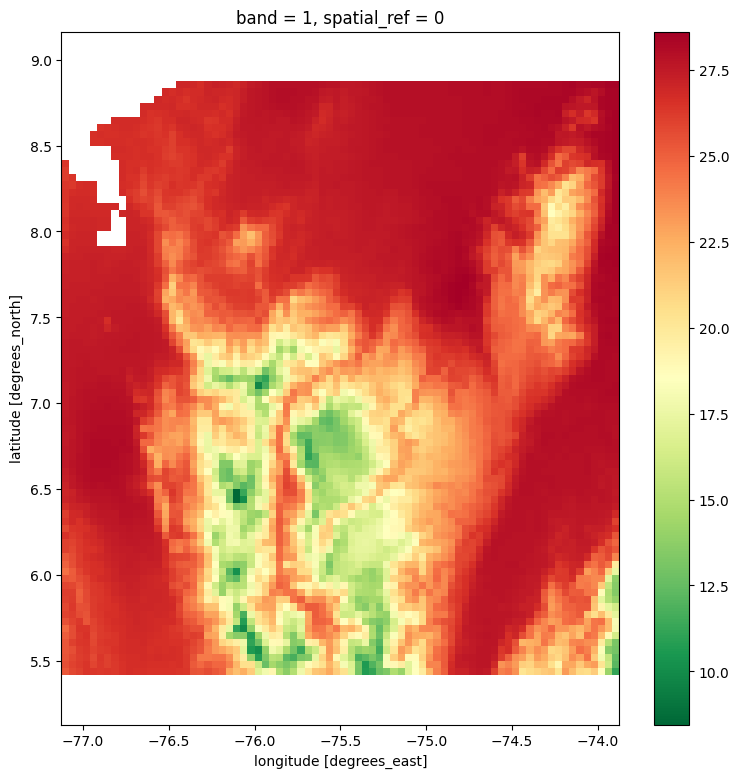

In [ ]:
f, ax = plt.subplots(figsize=(9,9))
plt.axis('equal')
bc_vars_lst[0].plot(ax=ax, cmap='RdYlGn_r')

#### Elevación

In [ ]:
download = WorldClim(res = '2.5', var = 'elev')
download.url_generation()

In [ ]:
# Victoria
output_dir = "/content/drive/MyDrive/Proyecto aplicado /Variables Bioclimaticas/Elevation_Output_ant"

# Juan
# output_dir = "/content/drive/MyDrive/research/codes/Proyecto aplicado /Variables Bioclimaticas/Elevation_Output_ant"

if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# Cargar y procesar variables de WorldClim
files_lst = natsorted(glob.glob("/content/wc2.1_2.5m_elev/*"))
bc_vars_lst = []

# Cargar y recortar imágenes bioclimáticas a la región de interés
for i in files_lst:
    bc_vars_lst += [bio_raster_loading(i, sta_roi_ant)]

# Exportar cada variable bioclimática como GeoTIFF
for idx, var in enumerate(bc_vars_lst):
    output_path = os.path.join(output_dir, f'elevation_{idx+1}.tif')
    var.rio.to_raster(output_path)
    print(f"Variable {idx+1} exportada a {output_path}")


Raster clipping done!
Variable 1 exportada a /content/drive/MyDrive/Proyecto aplicado /Variables Bioclimaticas/Elevation_Output_ant/elevation_1.tif


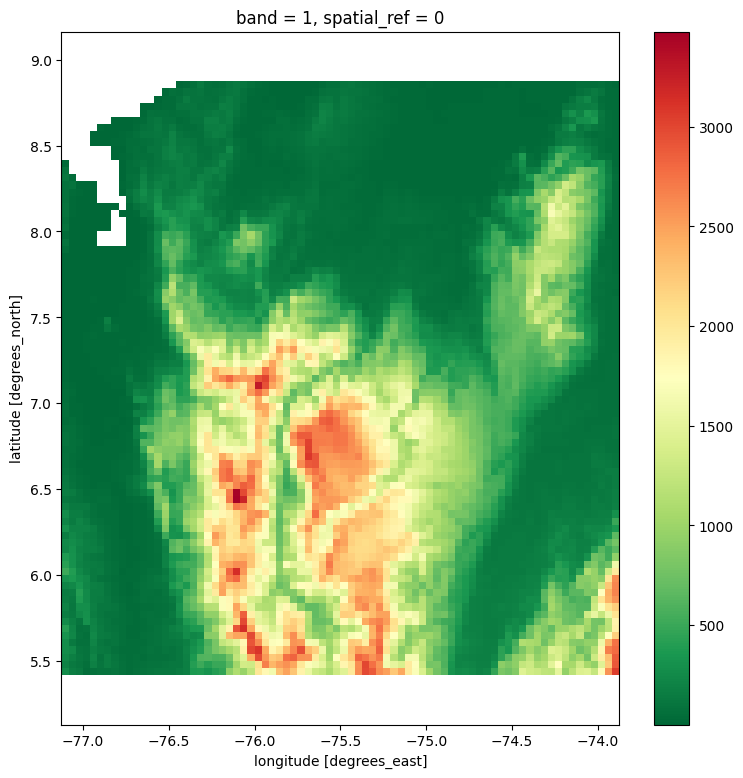

In [ ]:
f, ax = plt.subplots(figsize=(9,9))
plt.axis('equal')
bc_vars_lst[0].plot(ax=ax, cmap='RdYlGn_r')